<a href="https://colab.research.google.com/github/dp2292/CP01-Data-Alchemists/blob/Devansh/CP01_Data_Alchemists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: Data Pre-processing and Analysis

In [1]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [2]:
!gdown --id 1RfhNYBd7g70LdgJROvx8iPGygPhiGQLZ -O data/

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RfhNYBd7g70LdgJROvx8iPGygPhiGQLZ
To: /content/data/CP01.zip
100% 630M/630M [00:06<00:00, 94.1MB/s]


In [3]:
!unzip /content/data/CP01.zip -d /content/data

Archive:  /content/data/CP01.zip
replace /content/data/For_modeling.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('data/For_modeling.csv',index_col=0)
data = data.reset_index().drop(columns=['index'])
data.head(5)

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,...,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,...,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,...,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601139 entries, 0 to 9601138
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    int64  
 1   Distance    int64  
 2   PLong       float64
 3   PLatd       float64
 4   DLong       float64
 5   DLatd       float64
 6   Haversine   float64
 7   Pmonth      int64  
 8   Pday        int64  
 9   Phour       int64  
 10  Pmin        int64  
 11  PDweek      int64  
 12  Dmonth      int64  
 13  Dday        int64  
 14  Dhour       int64  
 15  Dmin        int64  
 16  DDweek      int64  
 17  Temp        float64
 18  Precip      float64
 19  Wind        float64
 20  Humid       float64
 21  Solar       float64
 22  Snow        float64
 23  GroundTemp  float64
 24  Dust        float64
dtypes: float64(13), int64(12)
memory usage: 1.8 GB


# Seoul Trip Data Features

Here is a description of the parameters and features in the Seoul trip dataset:

| Abbreviation | Parameters/Features         | Type        | Measurement                  |
|--------------|-----------------------------|-------------|------------------------------|
| Duration     | Trip duration               | Continuous  | |
| Distance     | Trip distance               | Continuous  | |
| PLong        | Pickup longitude            | Continuous  | Radians                      |
| PLatd        | Pickup latitude             | Continuous  | Radians                      |
| DLong        | Dropoff longitude           | Continuous  | Radians                      |
| DLatd        | Dropoff latitude            | Continuous  | Radians                      |
| Haversine    | Haversine distance          | Continuous  | Kilometres                   |
| Pmonth       | Pickup month                | Categorical | January, February, March, … December |
| Pday         | Pickup day                  | Categorical | 1, 2, 3, … 31               |
| Phour        | Pickup hour                 | Categorical | 0, 1, 2, … 23               |
| Pmin         | Pickup minute               | Continuous  | 1, 2, 3, … 60               |
| PDweek       | Pickup day of the week      | Categorical | Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday |
| Dmonth       | Dropoff month               | Categorical | January, February, March, … December |
| Dday         | Dropoff day                 | Categorical | 1, 2, 3, … 31               |
| Dhour        | Dropoff hour                | Categorical | 0, 1, 2, … 23               |
| Dmin         | Dropoff minute              | Continuous  | 1, 2, 3, … 60               |
| DDweek       | Dropoff day of the week     | Categorical | Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday |
| Temp         | Temperature                 | Continuous  | °C                           |
| Precip       | Precipitation               | Continuous  | Mm                           |
| Wind         | Wind speed                  | Continuous  | m/s                          |
| Humd         | Humidity                    | Continuous  | %                            |
| Solar        | Solar radiation             | Continuous  | MJ/m2                        |
| Snow         | Snowfall                    | Continuous  | cm                           |
| GroundTemp   | Ground temperature          | Continuous  | °C                           |
| Dust         | 1-hour average fine dust concentration | Continuous | ㎍/㎥             |


In [7]:
print(data.isna().sum().sort_values(ascending=False))

Duration      0
Dday          0
GroundTemp    0
Snow          0
Solar         0
Humid         0
Wind          0
Precip        0
Temp          0
DDweek        0
Dmin          0
Dhour         0
Dmonth        0
Distance      0
PDweek        0
Pmin          0
Phour         0
Pday          0
Pmonth        0
Haversine     0
DLatd         0
DLong         0
PLatd         0
PLong         0
Dust          0
dtype: int64


In [8]:
data.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,...,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,2.580294e+01,3.713519e+03,3.754761e+01,1.269908e+02,3.754770e+01,1.269907e+02,1.870315e+00,7.578754e+00,1.576714e+01,1.437801e+01,...,2.999278e+01,2.945771e+00,1.856201e+01,1.784856e-02,1.819274e+00,5.397565e+01,7.300679e-01,9.948924e-03,2.072376e+01,3.245798e+01
std,2.504333e+01,3.956611e+03,4.441376e-02,8.257065e-02,4.445305e-02,8.323726e-02,1.995361e+00,2.696797e+00,8.748012e+00,6.249244e+00,...,1.730960e+01,1.977624e+00,9.498075e+00,3.736282e-01,9.710258e-01,1.742159e+01,9.175004e-01,1.628091e-01,1.265221e+01,2.407264e+01
min,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,8.000000e+00,1.230000e+03,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,1.000000e+01,...,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,1.600000e+01,2.280000e+03,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,1.600000e+01,...,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,3.600000e+01,4.620000e+03,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,1.900000e+01,...,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,1.190000e+02,3.329000e+04,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,...,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


In [9]:
data_with_zero_displacement = data[data['Haversine']==0]
data_with_zero_displacement.head(5)

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,3,50,37.544666,126.888359,37.544666,126.888359,0.0,1,1,0,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
26,18,1600,37.556610,126.898018,37.556610,126.898018,0.0,1,1,0,...,27,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
139,2,10,37.575970,126.983063,37.575970,126.983063,0.0,1,1,0,...,40,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
159,43,1940,37.548222,127.067879,37.548222,127.067879,0.0,1,1,0,...,26,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
206,13,490,37.609566,126.930977,37.609566,126.930977,0.0,1,1,0,...,5,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [10]:
data_with_zero_displacement.shape

(955083, 25)

In [11]:
data.shape

(9601139, 25)

Out of 9601139 recorded trips, 955083 are round-trips, meaning the rider has dropped the bike from where he picked up it! Logically, it doesn't make sense to include this data in predicting future bike trips duration from one point to another as the pickup and dropoff point being same, we cannot get any idea about the rider's whereabouts in between the trip from this data.

In [12]:
# Check if pickup and dropoff coordinates are the same
same_coordinates_mask = np.logical_and(data['PLong'] == data['DLong'], data['PLatd'] == data['DLatd'])

# Filter the data based on both conditions
filtered_data = data[~(same_coordinates_mask & (data['Haversine'] == 0))]

In [13]:
filtered_data.shape

(8646056, 25)

In [14]:
# removing the tuples for which haversine == 0
filtered_data = data[data['Haversine'] != 0]

In [15]:
filtered_data.shape

(8646056, 25)

## Verifying all of the features' values

In [16]:
pd.set_option('display.max_columns', None)
filtered_data.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06
mean,2.314345e+01,3.489543e+03,3.754772e+01,1.269909e+02,3.754782e+01,1.269908e+02,2.076918e+00,7.602102e+00,1.578030e+01,1.423248e+01,2.912769e+01,2.916600e+00,7.602499e+00,1.577990e+01,1.427496e+01,3.003549e+01,2.918615e+00,1.837109e+01,1.814095e-02,1.806268e+00,5.428914e+01,7.116840e-01,1.020934e-02,2.044014e+01,3.247510e+01
std,2.286414e+01,3.703603e+03,4.430949e-02,8.236528e-02,4.435297e-02,8.310713e-02,1.998044e+00,2.710842e+00,8.746445e+00,6.334764e+00,1.725796e+01,1.963908e+00,2.710829e+00,8.746214e+00,6.535078e+00,1.730486e+01,1.965282e+00,9.588562e+00,3.800871e-01,9.711955e-01,1.743514e+01,9.070460e-01,1.648211e-01,1.270838e+01,2.412606e+01
min,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,2.088959e-02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,7.000000e+00,1.200000e+03,3.751424e+01,1.269201e+02,3.751424e+01,1.269196e+02,8.277592e-01,6.000000e+00,8.000000e+00,9.000000e+00,1.400000e+01,1.000000e+00,6.000000e+00,8.000000e+00,9.000000e+00,1.500000e+01,1.000000e+00,1.200000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.120000e+01,1.600000e+01
50%,1.500000e+01,2.180000e+03,3.754769e+01,1.269943e+02,3.754707e+01,1.269943e+02,1.404650e+00,8.000000e+00,1.600000e+01,1.600000e+01,2.900000e+01,3.000000e+00,8.000000e+00,1.600000e+01,1.600000e+01,3.000000e+01,3.000000e+00,1.990000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.500000e-01,0.000000e+00,2.090000e+01,2.700000e+01
75%,3.100000e+01,4.280000e+03,3.757324e+01,1.270618e+02,3.757328e+01,1.270624e+02,2.556391e+00,1.000000e+01,2.300000e+01,1.900000e+01,4.400000e+01,5.000000e+00,1.000000e+01,2.300000e+01,1.900000e+01,4.500000e+01,5.000000e+00,2.540000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.230000e+00,0.000000e+00,2.840000e+01,4.200000e+01
max,1.190000e+02,3.329000e+04,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


### Checks:
1. `Duration`: check for values that aren't too big or negative.
There are no trips found with such values of duration.
2. `Distance`: check for no negative distances or extreme outliers. None found.
3. `PLong` and `DLong`: Check that longitude values are within the valid range of -180 to 180 degrees. None found.
4. `PLatd` and `DLatd`: Check that latitude values are within the valid range of -90 to 90 degrees. None found.
5. `Haversine`: computed from PLong, DLong, PLatd and DLatd.
6. `Pmonth, Pday, Phour, Pmin, PDweek, Dmonth, Dday, Dhour, Dmin, DDweek`: Check for months (1-12), days (1-31), hours (0-23), minutes (0-59), and days of the week (0-6). Everything is in check.
7. `Temp, Precip, Wind, Humid, Solar, Snow, GroundTemp, Dust`: Check for unrealistic values and outliers based on current known range for these weather parameters.

**Check for duplicate values**


In [17]:
filtered_data.duplicated().value_counts()

False    8636811
True        9245
dtype: int64

This gives an indication that out of 8646056 tupples, 9245 tupples are duplicates.

In [18]:
#Remove all duplicates
filtered_data.drop_duplicates(inplace=True)
print("Dataset size after removing duplicates:", filtered_data.shape)

Dataset size after removing duplicates: (8636811, 25)


<ipython-input-18-ca0abfc58edb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop_duplicates(inplace=True)


### Visualization

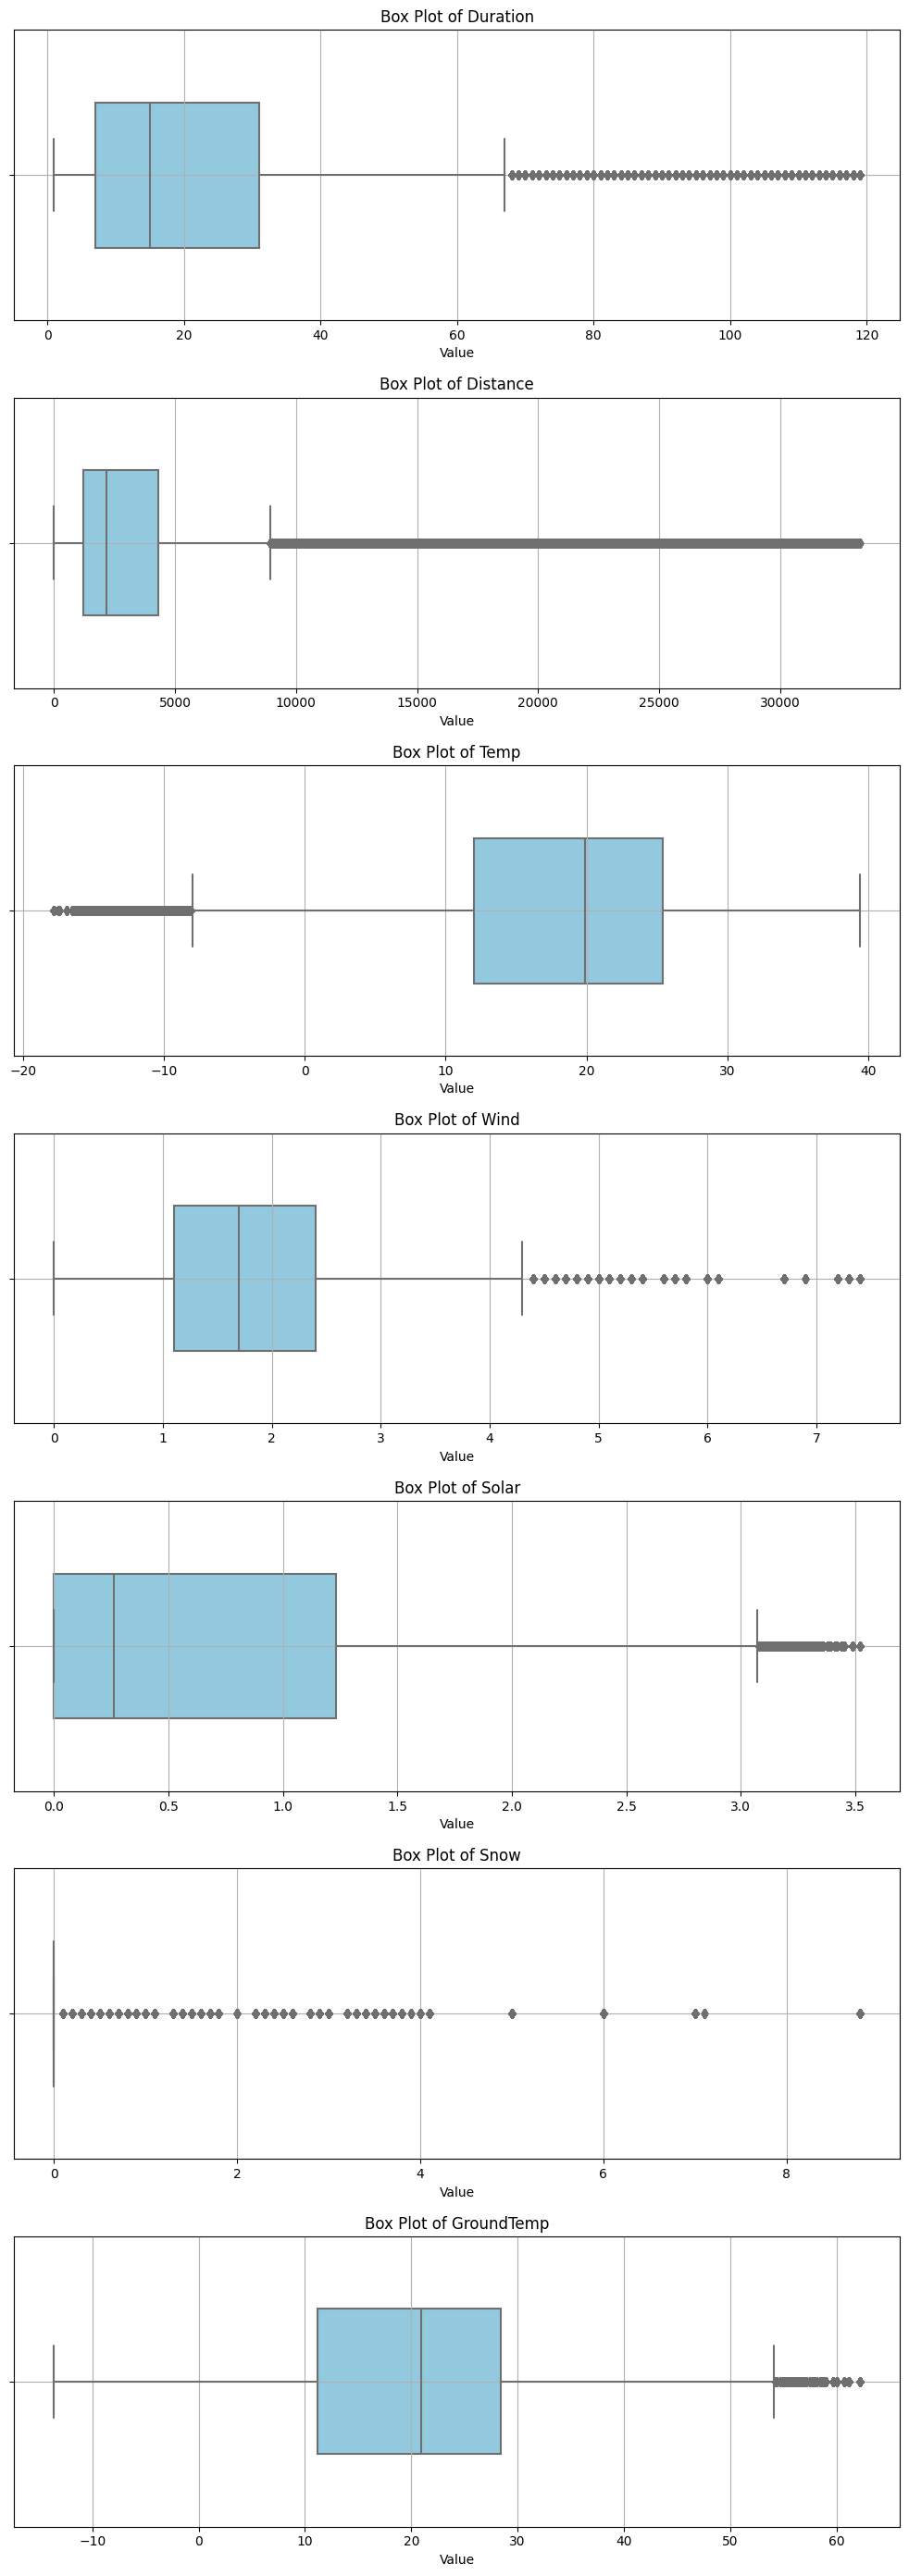

In [19]:
columns_to_plot = [
    'Duration', 'Distance','Temp','Wind','Solar','Snow', 'GroundTemp'
]

num_plots = len(columns_to_plot)
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 4*num_plots))


sns.set(style="whitegrid")

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    sns.boxplot(x=filtered_data[column], ax=ax, color='skyblue', width=0.5)
    ax.set_title(f'Box Plot of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [20]:
columns_for_histograms = [
    'Duration', 'Distance', 'Dhour', 'Phour', 'PLong',
    'PLatd', 'DLong', 'DLatd', 'Snow', 'GroundTemp', 'Dust', 'Pmonth'
]

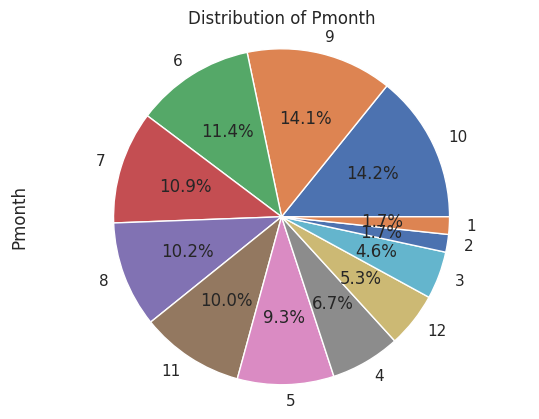

In [21]:
filtered_data['Pmonth'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Pmonth')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

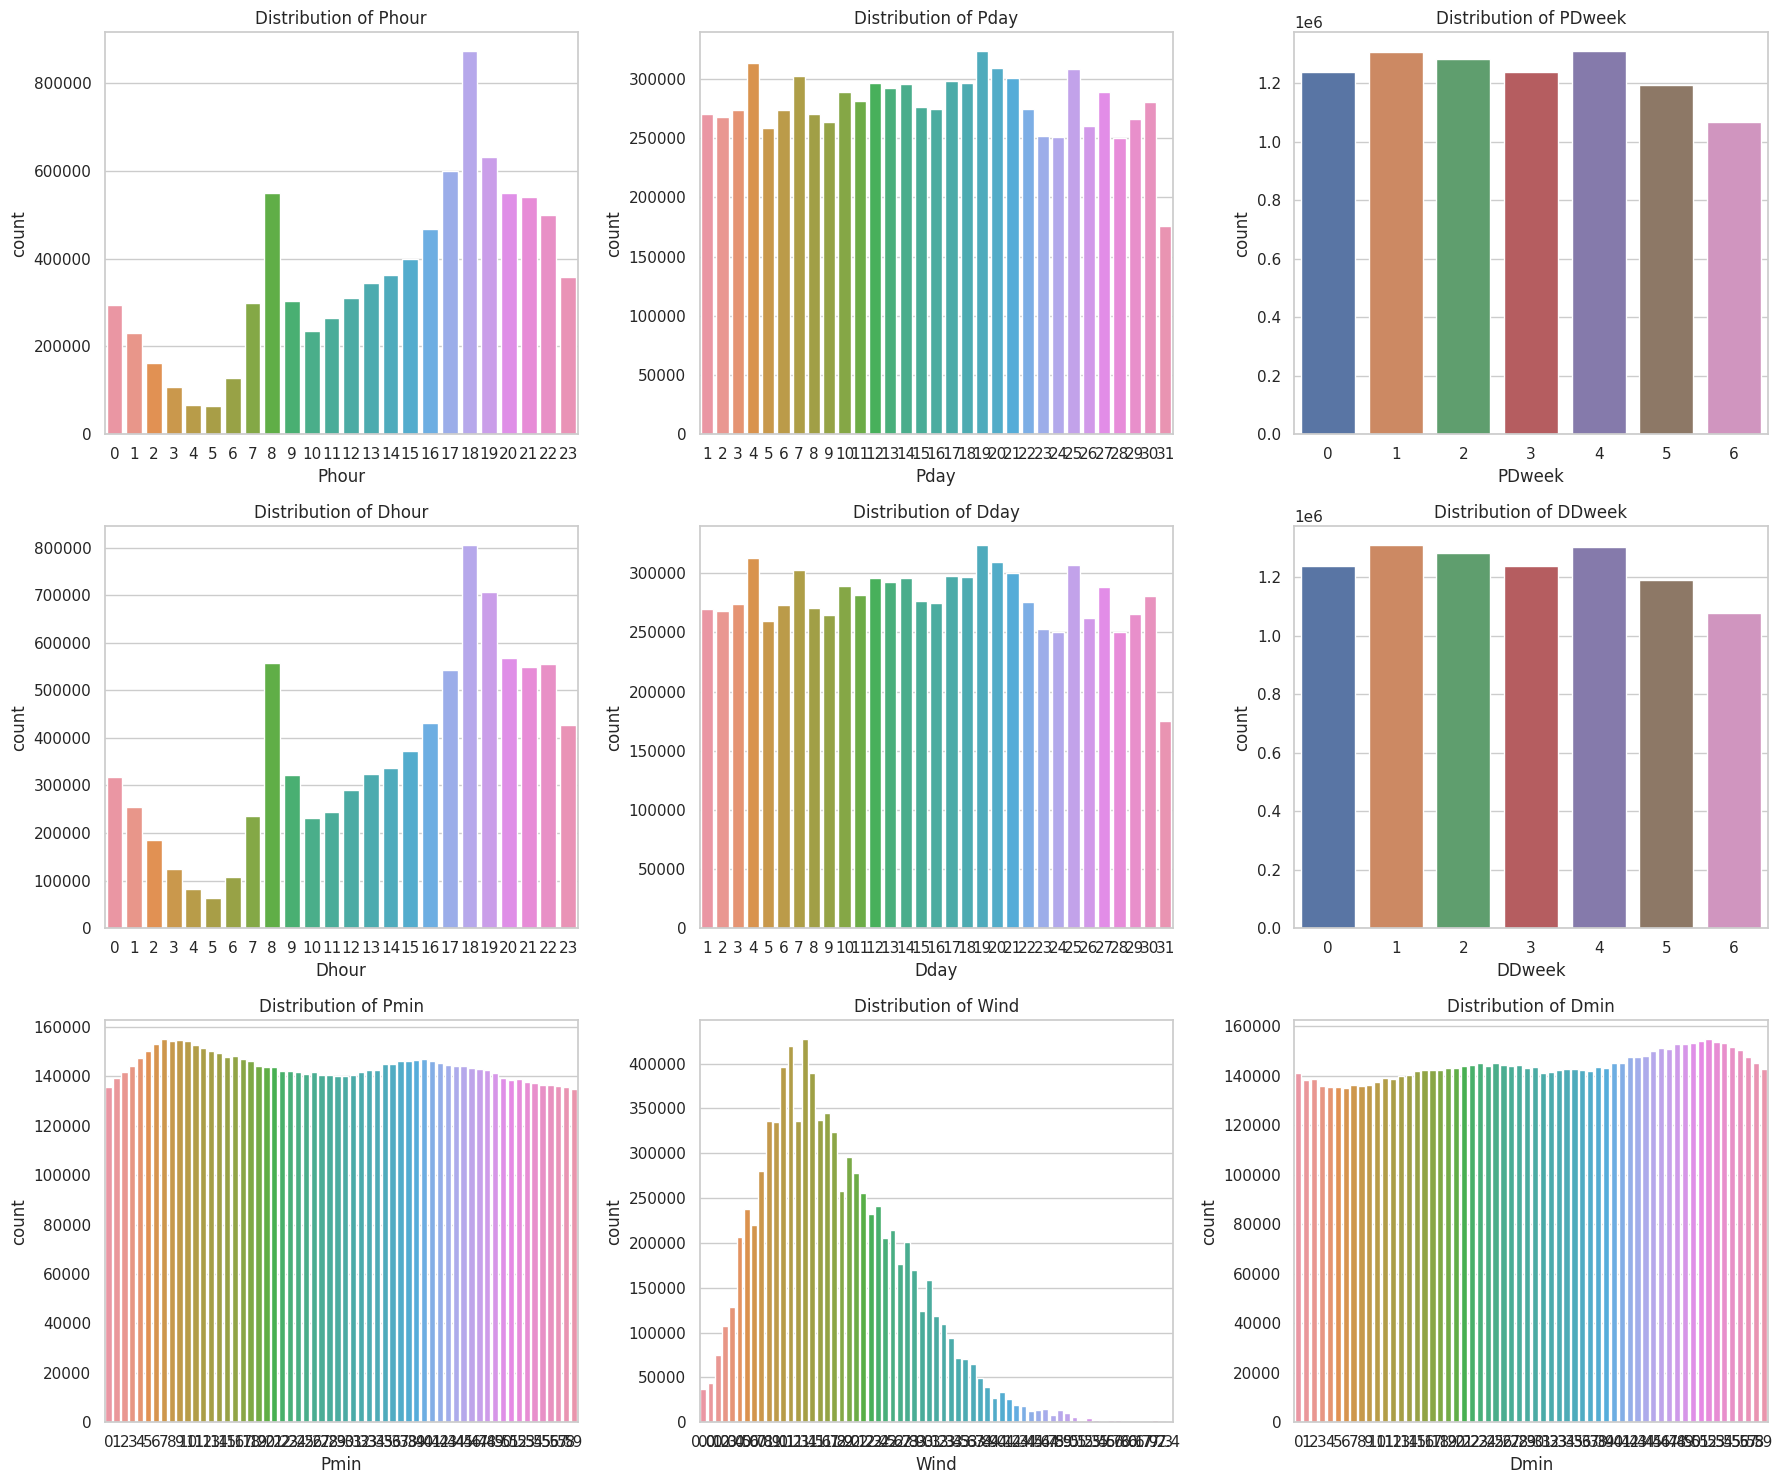

In [22]:
col_names = ['Phour', 'Pday', 'PDweek', 'Dhour', 'Dday', 'DDweek', 'Pmin', 'Wind', 'Dmin']

# Set up subplots with adjusted plot size
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, col in enumerate(col_names):
    sns.countplot(x=filtered_data[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

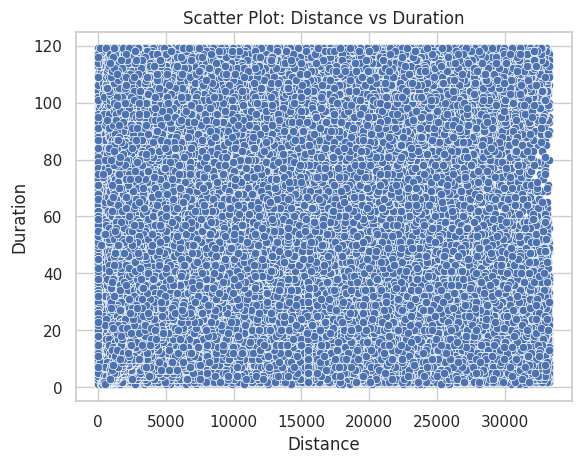

In [23]:
sns.scatterplot(x=filtered_data['Distance'], y=filtered_data['Duration'])
plt.title('Scatter Plot: Distance vs Duration')
plt.xlabel('Distance')
plt.ylabel('Duration')
plt.show()

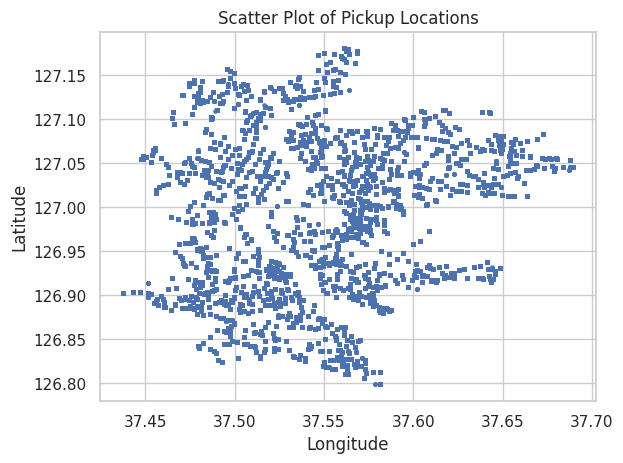

In [27]:
plt.scatter(filtered_data['PLong'], filtered_data['PLatd'], s=5, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Pickup Locations')
plt.grid(True)
plt.show()

In [24]:
correlation_matrix = filtered_data.corr()

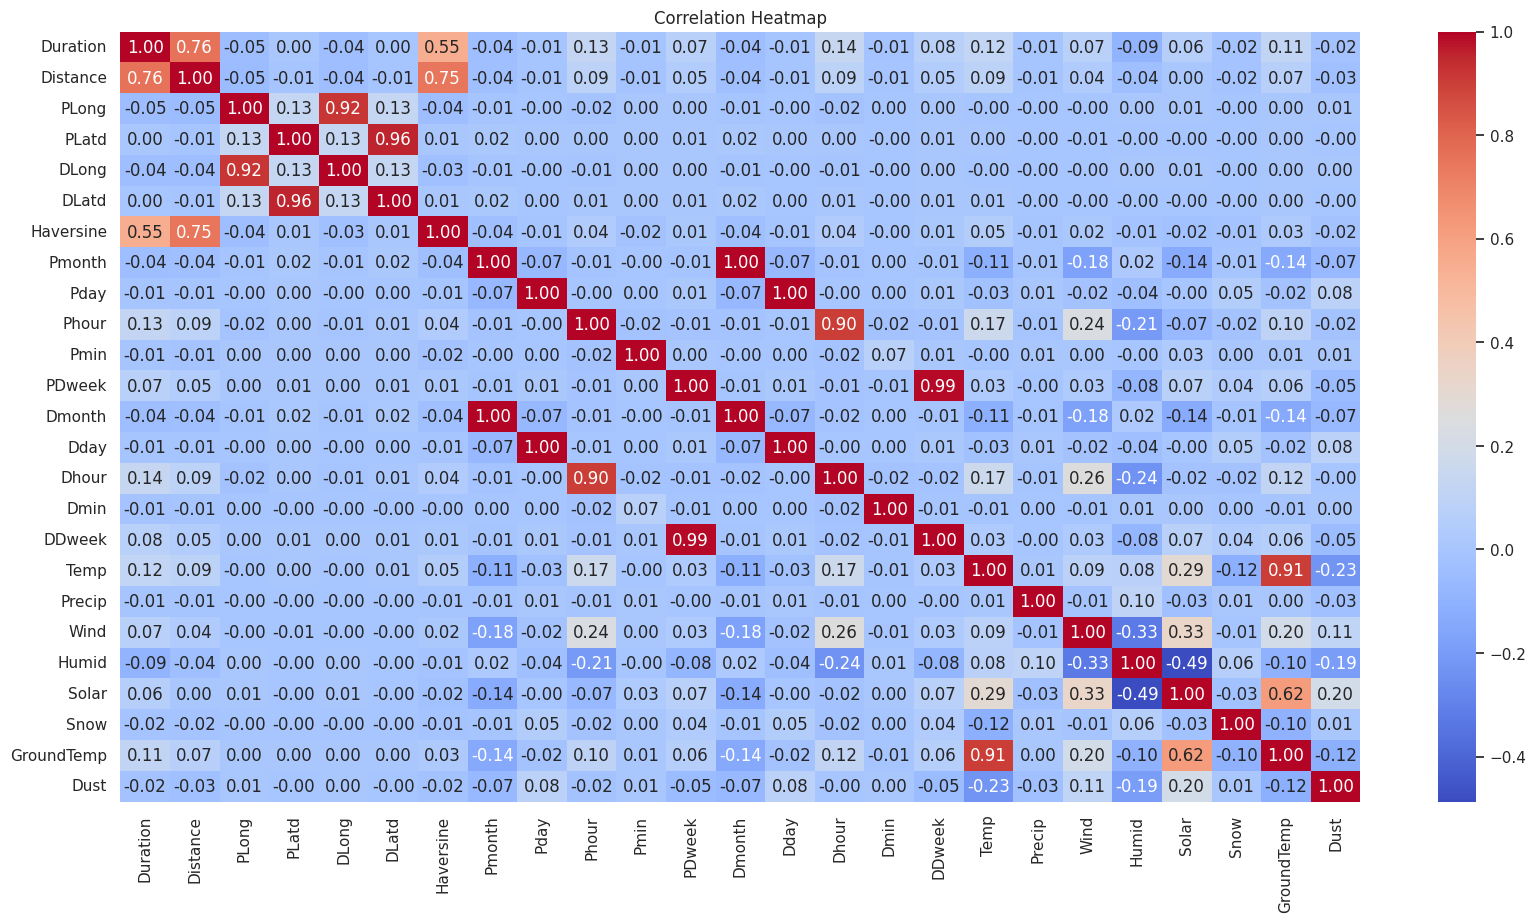

In [25]:
# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()